# Introduction
Least Squares method is a very useful method in approximating functions. They can be used to approximate signals with noise to a very good extent as far as the noise is not much.

# Least Squares Method
The coefficients can also be obtained by this method.This method basically fits the variables in a set of equations where the error which is squared is minimized.<br/>
## Derivation of Least Squares Method using linear algebra:
We want to find the solution for Ax=b<br/>
But due to more number of equations than the number of variables we may not get a perfect solution and hence we find a solution $x$ which minimizes the error $\epsilon$=$b-Ax$.<br/>



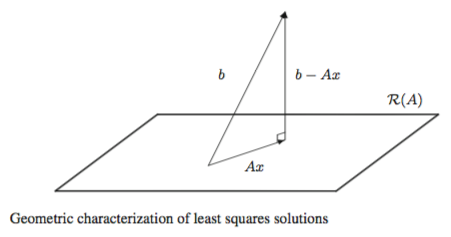

In [1]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/output_31_0.png')

In the figure above $b-Ax$ is minimum when it is perpendicular to $Ax$.<br/>
Thus,<br/>
$A^T.(b-Ax)=0$ $\longrightarrow$ $A$ is perpendicular to $b-Ax$<br/>
$A^T.b=(A^T.A).x$<br/>
$\therefore x=(A^T.A)^{-1}.A^T.b$



# Importing Libraries

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special as sp


In [3]:
x=np.linspace(0.5,20,40)

# Define a function for getting $Acos(x)+Bsin(x)\approx J_v(x)$

In [4]:
def method_1(x,x0):
    A_arr=[]
    x_new=x[int(np.where(x==x0)[0]):]
    J=sp.jv(1,x_new)
    for element in x_new:
        cos=math.cos(element)
        sin=math.sin(element)
        A_arr.append([cos,sin])
    return A_arr,J

In [5]:
#A,J=method_1(x,0.5)
AB1_array=[]  # will contain the A and B values
for x_0 in x:
    if x_0<=18:
        A,J=method_1(x,x_0)
        s=np.linalg.inv(np.dot(np.array(A).T,A))
        cl=(np.dot(s,np.dot(np.array(A).T,J)))
        #cl=np.linalg.lstsq(A,J)[0] 
        AB1_array.append(cl)


# Function for calculating the value of $v$ from $\phi$
We have $Acos(x)+Bsin(x)$<br/>
Dividing and multiplying by $\sqrt{A^{2}+B^{2}}$ <br/>
We get $\frac{Acos(x)}{\sqrt{A^{2}+B^{2}}}+\frac{Bsin(x)}{\sqrt{A^{2}+B^{2}}}$<br/>
Therefore we get $\sqrt{A^{2}+B^{2}}{cos(x+\phi)}$ where $\phi=\arccos(\frac{A}{\sqrt{A^{2}+B^{2}}})$

In [6]:
def calculate_v(AB_array):
    v_arr=[]
    for elements in AB_array:
        phi=np.arccos(elements[0]/math.sqrt(elements[0]**2+elements[1]**2))
        v=(phi-np.pi/4)*2/np.pi
        v_arr.append(v)
    return v_arr    

In [7]:
v_arr1=calculate_v(AB1_array) # has values of v for different x0

In [8]:
x_0_arr=np.linspace(0.5,18,36)

# Define a function for getting $\frac{Acos(x)}{\sqrt{x}}+\frac{Bsin(x)}{\sqrt{x}}\approx J_v(x)$

In [9]:
def method_2(x,x0): 
    '''
    returns the arrays A and J in the equation Ax=J
    '''
    A_arr=[]
    x_new=x[int(np.where(x==x0)[0]):]
    J=sp.jv(1,x_new)
    for element in x_new:
        cos=math.cos(element)/math.sqrt(element)
        sin=math.sin(element)/math.sqrt(element)
        A_arr.append([cos,sin])
    return A_arr,J

In [10]:
AB2_array=[]
for x_0 in x:
    if x_0<=18:
        A,J=method_2(x,x_0)
        A=np.array(A)
        s=np.linalg.inv(np.dot(A.T,A))
        cl=(np.dot(s,np.dot(A.T,J)))
        AB2_array.append(cl)

## Plot of function obtained by method 1
The amplitudes do not match because in method 1 we do not take it into account.

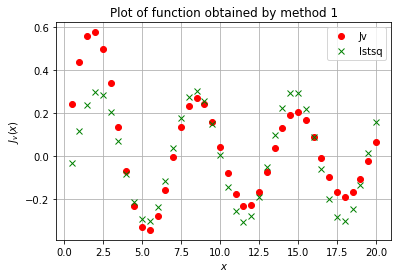

In [11]:
A_arr=[]
for element in x:
    cos=math.cos(element)
    sin=math.sin(element)
    A_arr.append([cos,sin])
J=sp.jv(1,x)    
cl=np.linalg.lstsq(A_arr,J)[0]
a=cl[0]*np.cos(x)
b=cl[1]*np.sin(x)
c=a+b
plt.plot(x,sp.jv(1,x),'ro',label='Jv')
plt.plot(x,c,'gx',label='lstsq') #obtained function by method 1
plt.title('Plot of function obtained by method 1')
plt.xlabel('$x$')
plt.ylabel('$J_v(x)$')
plt.legend()
plt.grid()
plt.show()


## Plot of function obtained by method 2
The plot matches quite nicely and gives us a very good approximate of the Bessel's function.

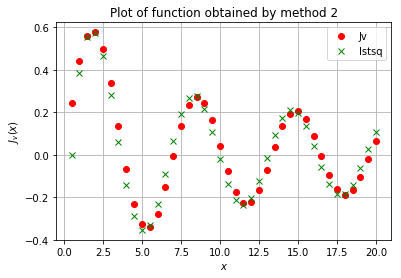

In [12]:
A_arr=[]
for element in x:
    cos=math.cos(element)/math.sqrt(element)
    sin=math.sin(element)/math.sqrt(element)
    A_arr.append([cos,sin])
J=sp.jv(1,x)    
cl=np.linalg.lstsq(A_arr,J)[0]
a=cl[0]*np.cos(x)/np.sqrt(x)
b=cl[1]*np.sin(x)/np.sqrt(x)
c=a+b
plt.plot(x,sp.jv(1,x),'ro',label='Jv')
plt.plot(x,c,'gx',label='lstsq') #obtained function by method 2
plt.title('Plot of function obtained by method 2')
plt.xlabel('$x$')
plt.ylabel('$J_v(x)$')
plt.legend()
plt.grid()
plt.show()

In [13]:
v_arr2=calculate_v(AB2_array) # has values of v for different x0

## Plot of $v$ vs $x_0$
For method 1 (green dots) the value of v increases as $x_0$ increases.And then it oscillates a little bit.This is because in method one we don't take the amplitude into account thus leading to error.<br/>
For method 2 (blue dots) the value of v increases and then saturates and also it doesn't oscillate much like that of method 1. 

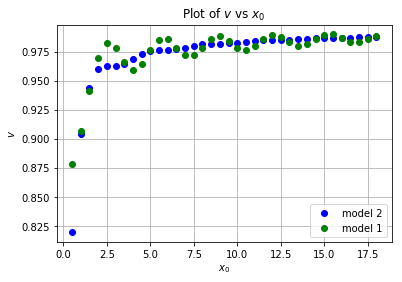

In [14]:
plt.plot(x_0_arr,v_arr2,'bo',label='model 2')
plt.plot(x_0_arr,v_arr1,'go',label='model 1')
plt.title('Plot of $v$ vs $x_0$')
plt.xlabel('$x_0$')
plt.ylabel('$v$')
plt.legend()
plt.grid()
plt.show()

In [15]:
def calcnu(x,x0,eps,model):
    AB_array=[]
    for x_0 in x:
        if x_0<=x0:
            A,J=model(x,x_0)
            noise=eps*np.random.randn(len(J))
            J+=noise #add noise to the function
            A=np.array(A)
            s=np.linalg.inv(np.dot(A.T,A))
            cl=(np.dot(s,np.dot(A.T,J)))
            #cl=np.linalg.lstsq(A,J)[0]  #change to least square
            AB_array.append(cl)
    return AB_array
    
    

In [16]:
AB3_array=calcnu(x,18,0.01,method_1) # has values of A and B for model 1 with noise
AB4_array=calcnu(x,18,0.01,method_2) # has values of A and B for model 2 with noise
v_arr3=calculate_v(AB3_array)
v_arr4=calculate_v(AB4_array)

# Plot of $v$ vs $x_0$ with noise ($\epsilon = 0.01$)

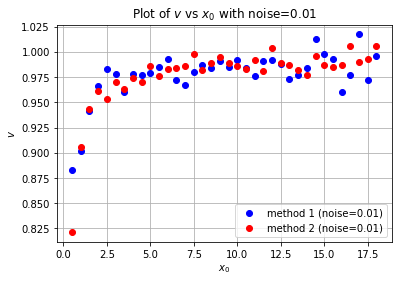

In [17]:
AB3_array=calcnu(x,18,0.01,method_1) # has values of A and B for model 1 with noise
AB4_array=calcnu(x,18,0.01,method_2) # has values of A and B for model 2 with noise
v_arr3=calculate_v(AB3_array)
v_arr4=calculate_v(AB4_array)
plt.plot(x_0_arr,v_arr3,'bo',label='method 1 (noise=0.01)')
plt.plot(x_0_arr,v_arr4,'ro',label='method 2 (noise=0.01)')
plt.title('Plot of $v$ vs $x_0$ with noise=0.01')
plt.xlabel('$x_0$')
plt.ylabel('$v$')
plt.legend()
plt.grid()
plt.show()

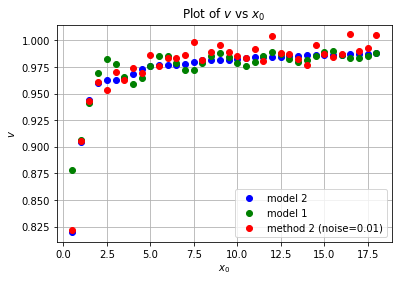

In [21]:
plt.plot(x_0_arr,v_arr2,'bo',label='model 2')
plt.plot(x_0_arr,v_arr1,'go',label='model 1')
#plt.plot(x_0_arr,v_arr3,'bo',label='method 1 (noise=0.01)')
plt.plot(x_0_arr,v_arr4,'ro',label='method 2 (noise=0.01)')
plt.title('Plot of $v$ vs $x_0$ ')
plt.xlabel('$x_0$')
plt.ylabel('$v$')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Plot $v$ vs $x_0$ for different values of noise

In [22]:
#plotting values of v vs x_0 for different values of epsilon
epsilon=[0,0.001,0.01,0.1,1]
def plot(x,x_0,epsilon,method,method_number):
    i=0
    for eps in epsilon:
        AB1_array=calcnu(x,x_0,eps,method) # has values of A and B for model 1 with noise
        v_arr1=calculate_v(AB1_array)
        #plt.subplot(5,2,i+1)
        plt.plot(x_0_arr[:-(int(x_0/10))],v_arr1[:-(int(x_0/10))],'bo',label='method %d (noise=%f)'%(method_number,eps))
        plt.title('Plot of $v$ vs $x_0$ with noise=%f '%eps)
        plt.xlabel('$x_0$')
        plt.ylabel('$v$')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()


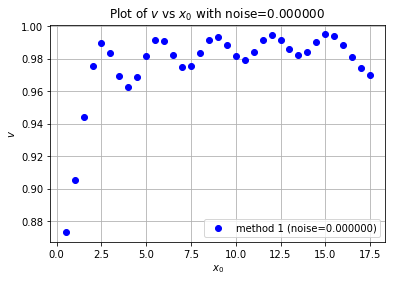

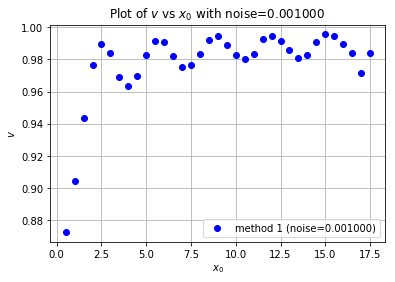

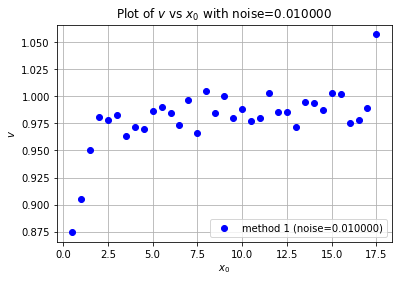

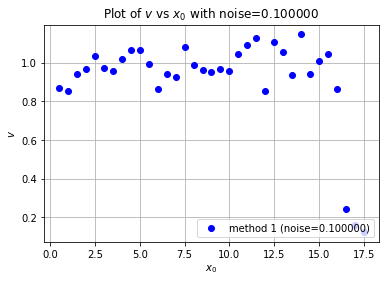

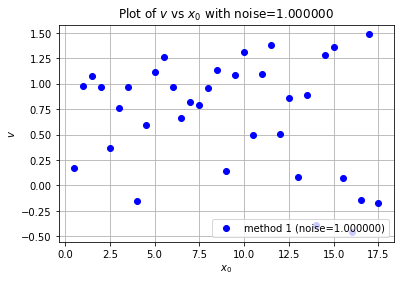

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


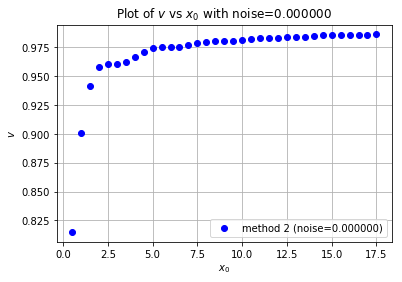

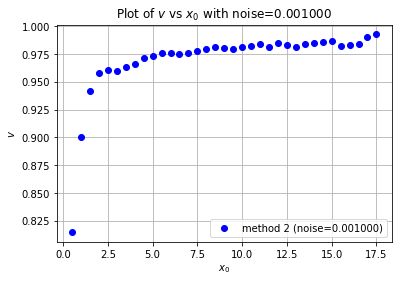

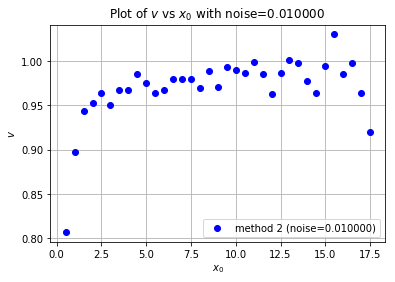

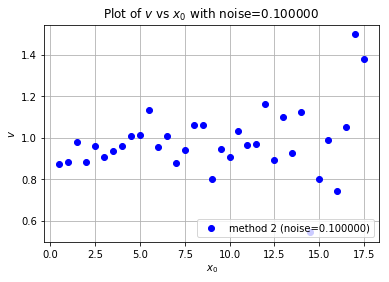

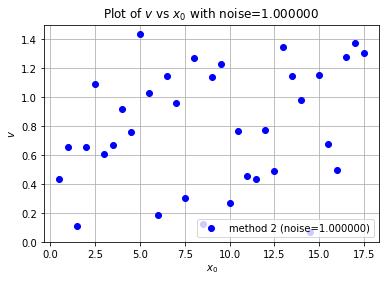

In [23]:
plot(x_0_arr,18,epsilon,method_1,1)
plot(x_0_arr,18,epsilon,method_2,2)

# Plotting with different number of measurements (with $\epsilon=0.01$)
The plots show that for sufficiently high number of measurements the value of $v$ converges to 1. Thus it shows that the number of measuremnts is also an important factor in fitting functions with least squares method.

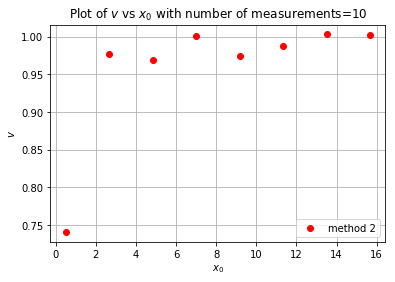

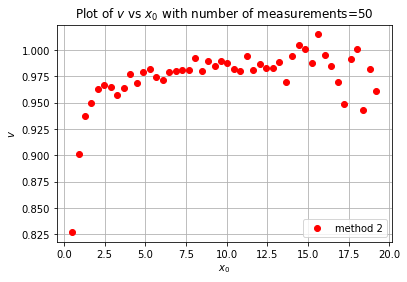

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


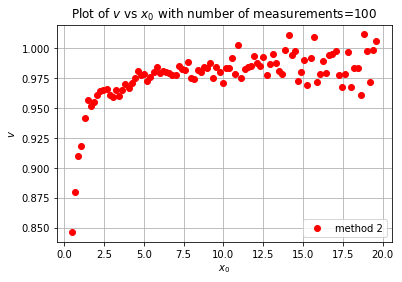

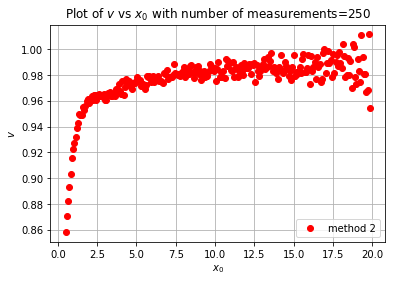

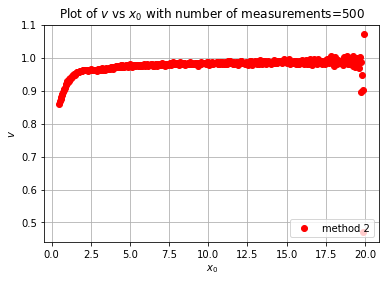

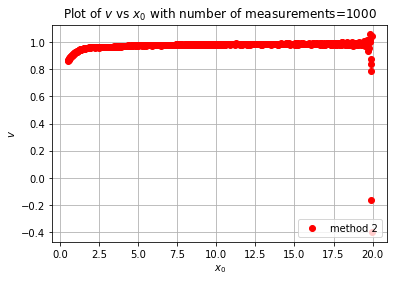

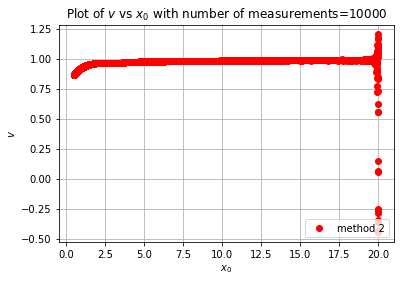

In [24]:
sizes=[10,50,100,250,500,1000,10000]
for size in sizes:
    x_array=np.linspace(0.5,20,size)
    AB1_array=calcnu(x_array,20,0.01,method_2) # has values of A and B for model 1 with noise
    v_arr1=calculate_v(AB1_array)
    plt.plot(x_array[:-(int(x_0/10))],v_arr1[:-(int(x_0/10))],'ro',label='method 2')
    plt.title('Plot of $v$ vs $x_0$ with number of measurements=%d'%size)
    plt.xlabel('$x_0$')
    plt.ylabel('$v$')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Discussions and Conclusions
1:Model Selection:<br/>
We tried out two methods to fit the data.The first one namely $Acos(x)+Bsin(x)\approx J_v(x)$ did not fit well because of the amplitude factor not taken into account. But the second method namely $\frac{Acos(x)}{\sqrt{x}}+\frac{Bsin(x)}{\sqrt{x}}\approx J_v(x)$ turned out to be a very good approximate function for the Bessel's function of the first kind.<br/>
2:Effect of noise:<br/> 
The value of noise in the data hampers our fits by least squares method.As the graphs suggest the function is not captured properly by the least squares method. Thus we have to use some method to remove th noise from the data before fitting it with least squares.This can be done by using various filters.<br/>
3:Effect of increasing the nuber of measurements:<br/>
By increasing the nuber of measurements the value of $v$ starts to approach the desired value(here it is equal to 1).
This is because of the increase in the datapoints which makes the least squares approximator get a better estimate of the function.